# Relatório 01 até abril do indicador de EFICÁCIA medindo a taxa de sucesso que são as CIRURGIAS REALIZADAS

---

Qual o peso vamos encontrar.

- Considerando a meta de 5 castração por dia para cada um dos quatro subgrupos que são: cães, cadelas, gatos e gatas. Em forma sucinta, esperasse ao fim de cada dia de trabalho no trailer, ter castrado
    - 5 cães;
    - 5 cadelas;
    - 5 gatos;
    - 5 gatas;
 
---

O indicador atuará nas castrações realizados, distribuidas por dia em 4 grupos.

- o cálculo do indicador de eficácia é:
    - $\frac{realizado}{esperado} * 100$
 
---

In [2]:
import numpy as np
from datetime import datetime, date, timedelta
import datetime
import string
import time
from pandas import DataFrame, read_csv,unique
import matplotlib.pyplot as plt
from os import getcwd
from pygsheets import authorize
import pivottablejs

## Integração das APIs do GCP - das contas google 

### Conta RIO

In [3]:
credenciaisRio = authorize(service_file=getcwd()+'/keyapirio.json')

#### na célula abaixo os Links estarão ocultos

In [4]:
linkAgendamentoRio = 'https://docs.google.com/spreadsheets/d/xxxxxxxxxx/'

#### Código de integração da APIRest google sheets

In [5]:
# acessando planilha
planilhaAgendamentoRio = credenciaisRio.open_by_url(linkAgendamentoRio)
tabelaAgendamentoRio = planilhaAgendamentoRio.worksheet_by_title('Respostas ao formulário 1')

### Quadro de Dados (DataFrame) do Rio

In [6]:
from datetime import date
df_rio_agend = DataFrame(tabelaAgendamentoRio)
print (f'Na data {date.today()} esse quadro de dados está sendo criado.')

Na data 2024-05-17 esse quadro de dados está sendo criado.


In [7]:
print(f'Até o momento informado na linha de cima, o agendamento foi aplicado {df_rio_agend.shape[0] - 1} pessoas.')

Até o momento informado na linha de cima, o agendamento foi aplicado 1286 pessoas.


#### Atualização dos atributos

In [8]:
df_rio_agend = df_rio_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
df_rio_agend.columns = list(df_rio_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].iloc[0])

In [9]:
print (f'Segue a lista com todas variáveis da base de dados: {list(df_rio_agend.columns)}')
print (f'''\nVamos utilizar as variáveis: {list(df_rio_agend.columns)[0]}, {list(df_rio_agend.columns)[11]}, 
{list(df_rio_agend.columns)[12]} e {list(df_rio_agend.columns)[13]}.''')

Segue a lista com todas variáveis da base de dados: ['Carimbo de data/hora', 'NOME COMPLETO', 'ENDEREÇO COMPLETO', 'BAIRRO', 'CEP', 'DATA DE NASCIMENTO', 'TELEFONE', 'EMAIL', 'NOME DO ANIMAL', 'CPF', 'ESPECIE', 'GENERO', 'STATUS/ATENDIMENTOS', 'MOTIVO DA RECUSA', 'ÓBITO/INTERCORRÊNCIA', 'LOCAL', 'NOME DO ANIMAL', 'RAÇA', 'Nº DO CHIP']

Vamos utilizar as variáveis: Carimbo de data/hora, GENERO, 
STATUS/ATENDIMENTOS e MOTIVO DA RECUSA.


In [9]:
df_rio_agend = df_rio_agend.drop([0,1], axis=0)

Nessa etapa vamos criar o sub quadro de dados com apenas os atributos que serão usados no relatório bimestral.

In [10]:
relat_agend_rio = DataFrame(DataFrame(df_rio_agend['Carimbo de data/hora'].str.split(' ', expand=True)[0]).join(df_rio_agend[['ESPECIE','GENERO','STATUS/ATENDIMENTOS']]))

relat_agend_rio['STATUS/ATENDIMENTOS'].unique()

array(['REALIZADA', 'RECUSA', 'CIRURGIA REALIZADA', 'FALTA',
       'CIRURGIA REALIZADA ', 'CHIPAGEM', 'RECUSA ', ''], dtype=object)

In [11]:
relat_agend_rio = relat_agend_rio.loc[
(relat_agend_rio['STATUS/ATENDIMENTOS'] == 'CIRURGIA REALIZADA') |
(relat_agend_rio['STATUS/ATENDIMENTOS'] == 'CIRURGIA REALIZADA ') |
(relat_agend_rio['STATUS/ATENDIMENTOS'] == 'REALIZADA')]
qtdes_aplicacoes = relat_agend_rio.shape[0]

In [12]:
print (f'''Saímos de {df_rio_agend.shape[0]} aplicações, 
para {qtdes_aplicacoes} aplicações.
Isso quer dizer que estamos trabalhando com {round(100*(qtdes_aplicacoes/df_rio_agend.shape[0]),2)}% do total.''')

Saímos de 1285 aplicações, 
para 745 aplicações.
Isso quer dizer que estamos trabalhando com 57.98% do total.


In [13]:
relat_agend_rio.head(3)

,0,ESPECIE,GENERO,STATUS/ATENDIMENTOS
2,19/02/2024,CANINO,MACHO,REALIZADA
4,19/02/2024,CANINO,FEMEA,CIRURGIA REALIZADA
5,19/02/2024,FELINO,FEMEA,CIRURGIA REALIZADA


parei aqui no dia 14/05/2024, iniciei também no mesmo dia, 14/05/2024

Retomando relatório 01 - 16/05/2024

#### Formatando atributos

In [14]:
relat_agend_rio.columns = ['data','especie','genero','status']

In [15]:
relat_agend_rio.head(1)

,data,especie,genero,status
2,19/02/2024,CANINO,MACHO,REALIZADA


#### Nessa etape o atributo "data" será convertido para o formato de data utilizado nas funções nativas do python

In [16]:
from convert_datas import converte_data
relat_agend_rio['data'] = relat_agend_rio['data'].map(lambda x: converte_data(x))

In [17]:
relat_agend_rio.head(1)

,data,especie,genero,status
2,2024-02-19,CANINO,MACHO,REALIZADA


In [19]:
from pandas import Series
rio_agend_relat_01_bimest = DataFrame(relat_agend_rio['data'].dt.month_name()).rename(columns={'data':'meses'}).join(relat_agend_rio[['data','especie','genero']], how='left')

In [20]:
rio_agend_relat_01_bimest['especie'] = rio_agend_relat_01_bimest['especie'].str.lower()
rio_agend_relat_01_bimest['genero'] = rio_agend_relat_01_bimest['genero'].str.lower()
rio_agend_relat_01_bimest['meses'] = rio_agend_relat_01_bimest['meses'].str.lower()

Verificando se tem dados faltantes em atributos preditores.

In [21]:
print (rio_agend_relat_01_bimest['especie'].unique())
print (rio_agend_relat_01_bimest['genero'].unique())

['canino' 'felino' '']
['macho' 'femea']


In [22]:
rio_agend_relat_01_bimest['especie'].value_counts()

especie
felino    417
canino    327
            1
Name: count, dtype: int64

Identificando linha com especie faltante, resultado de falta de governança.

In [23]:
rio_agend_relat_01_bimest.loc[rio_agend_relat_01_bimest['especie']=='']

,meses,data,especie,genero
670,march,2024-03-18,,femea


retirando a linha com espécie faltante.

In [24]:
rio_agend_relat_01_bimest = rio_agend_relat_01_bimest.drop(rio_agend_relat_01_bimest.loc[rio_agend_relat_01_bimest['especie']==''].index[0])

In [25]:
rio_agend_relat_01_bimest.shape

(744, 4)

In [26]:
rio_agend_relat_01_bimest['especie'].unique()

array(['canino', 'felino'], dtype=object)

In [ ]:
rio_agend_relat_01_bimest['genero'].loc[(rio_agend_relat_01_bimest['especie']=='canino') & (rio_agend_relat_01_bimest['genero']=='macho')]='canino_macho'
rio_agend_relat_01_bimest['genero'].loc[(rio_agend_relat_01_bimest['especie']=='canino') & (rio_agend_relat_01_bimest['genero']=='femea')]='canino_femea'
rio_agend_relat_01_bimest['genero'].loc[(rio_agend_relat_01_bimest['especie']=='felino') & (rio_agend_relat_01_bimest['genero']=='macho')]='felino_macho'
rio_agend_relat_01_bimest['genero'].loc[(rio_agend_relat_01_bimest['especie']=='felino') & (rio_agend_relat_01_bimest['genero']=='femea')]='felino_femea'

In [28]:
rio_agend_relat_01_bimest = rio_agend_relat_01_bimest.sort_values(by='data')

In [29]:
rio_agend_relat_01_bimest = rio_agend_relat_01_bimest[['data','meses','genero']]

Para deixar os dados com o mesmo conjunto final, dia 02 de maio, irei retirar os dados posteriores.

In [30]:
from pandas import Series
rio_agend_relat_01_bimest = rio_agend_relat_01_bimest[rio_agend_relat_01_bimest['data'].between('2024-02-19','2024-05-02')]

In [31]:
rio_agend_relat_01_bimest.shape

(660, 3)

In [32]:
print (f'''Saímos de {df_rio_agend.shape[0]} aplicações, 
para {rio_agend_relat_01_bimest.shape[0]} aplicações.
Isso quer dizer que estamos trabalhando com {round(100*(rio_agend_relat_01_bimest.shape[0]/df_rio_agend.shape[0]),2)}% do total.''')

Saímos de 1285 aplicações, 
para 660 aplicações.
Isso quer dizer que estamos trabalhando com 51.36% do total.


In [33]:
agend_rio_relat_01_bimest = DataFrame(rio_agend_relat_01_bimest.groupby(['data']).value_counts()).reset_index()
agend_rio_relat_01_bimest.head(2)

,data,meses,genero,count
0,2024-02-19,february,canino_macho,4
1,2024-02-19,february,canino_femea,3


#### O indicador atuará nas castrações realizados, distribuidas por dia em 4 grupos.

- o cálculo do indicador de eficácia é:
    - $\frac{realizado}{esperado} * 100$


In [34]:
agend_rio_relat_01_bimest['eficacia'] = (agend_rio_relat_01_bimest[['count']]/5)*100

In [41]:
agend_rio_relat_01_bimest.head()

,data,meses,genero,count,eficacia
0,2024-02-19,february,canino_macho,4,80.0
1,2024-02-19,february,canino_femea,3,60.0
2,2024-02-19,february,felino_femea,2,40.0
3,2024-02-19,february,felino_macho,1,20.0
4,2024-02-20,february,felino_macho,10,200.0


#### Etapa de geração das bases de dados

Base original - arquivo criado 

In [36]:
df_rio_agend.to_csv('base_rio_original_relat_01_bim.csv', index=False)

Base formatada da original, sem indicadores ou contingência

In [37]:
relat_agend_rio.to_csv('base_formatada_rio_relat_01_bim.csv', index=False)

Base de uso para o dashboard do relatório 01 bimestral

In [38]:
agend_rio_relat_01_bimest.to_csv('base_rio_dashboard.csv',index=False)

In [40]:
from pivottablejs import pivot_ui

pivot_ui(agend_rio_relat_01_bimest, outfile_path='/home/lino/Área de Trabalho/acaocidada/note_acaocidada/riorelatorio01.html', url='http://localhost/riorelatorio01.html')

### Conta RIO2

### Conta Carioca

Nessa etapa estamos acessando a base de dados do google via API, que em outras palavras se remete a integração de sistemas externos

In [2]:
credenciaisCarioca = authorize(service_file=getcwd()+'/keysurveycarioca.json')

#### chave

In [3]:
link = 'https://docs.google.com/spreadsheets/d/xxxxxxxxxxxxxxx/'

#### Acessando a planilha

In [4]:
# acessando planilha
planilha = credenciaisCarioca.open_by_url(link)
tabela = planilha.worksheet_by_title("Respostas ao formulário 1")

#### Quadro de Dados (DataFrame)

Nessa etapa estamos transformando a base de atualizada até o momento da última integração realizada acima. Em um quadro de dados, para que assim possamos extrair a riqueza que a base tem a nos oferecer.

Nessa parte estamos criando o objeto com todos os dados, que até a data informada

In [160]:
df_carioca_agend = DataFrame(tabela)
print(f'Na data {datetime.date.today().isoformat()} esse quadro de dados está sendo criado.')

Na data 2024-05-03 esse quadro de dados está sendo criado.


In [161]:
print(f'Até o momento informado na linha de cima, o agendamento foi aplicado {df_carioca_agend.shape[0] - 1} pessoas.')

Até o momento informado na linha de cima, o agendamento foi aplicado 1535 pessoas.


In [91]:
df_carioca_agend.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Carimbo de data/hora,LOCAL,NOME COMPLETO,,BAIRRO,CEP,DATA DE NASCIMENTO,TELEFONE,EMAIL,CPF,...,ENDEREÇO COMPLETO,CPF,Como soube do Projeto de Castração de cães e g...,,,,,,,


In [162]:
df_carioca_agend = df_carioca_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
df_carioca_agend.columns = list(df_carioca_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].iloc[0])

Nessa etapa vamos informar os atributos ou variáveis que tem o quadro de dados, que em outras palavras são as perguntas (que se transformam em colunas na base de dados) respondidas no formulário __agendamento__ 

In [163]:
print (f'Segue a lista com todas variáveis da base de dados: {list(df_carioca_agend.columns)}')
print (f'''\nVamos utilizar as variáveis: {list(df_carioca_agend.columns)[0]}, {list(df_carioca_agend.columns)[11]}, 
{list(df_carioca_agend.columns)[12]} e {list(df_carioca_agend.columns)[13]}.''')

Segue a lista com todas variáveis da base de dados: ['Carimbo de data/hora', 'LOCAL', 'NOME COMPLETO', '', 'BAIRRO', 'CEP', 'DATA DE NASCIMENTO', 'TELEFONE', 'EMAIL', 'CPF', 'NOME DO ANIMAL', 'ESPÉCIE', 'GÊNERO', 'STATUS/ATENDIMENTO', 'MOTIVO', 'ENDEREÇO COMPLETO', 'CPF', 'Como soube do Projeto de Castração de cães e gatos?']

Vamos utilizar as variáveis: Carimbo de data/hora, ESPÉCIE, 
GÊNERO e STATUS/ATENDIMENTO.


In [164]:
df_carioca_agend = df_carioca_agend.drop(0, axis=0)

In [ ]:
df_carioca_agend.head(1)

Essa é a etapa que iremos criar o sub quadro de dados (dataframe) com as variáveis importantes para o trabalho. Que nada mais é do que a segmentação.

In [166]:
relatorio_agendamento_carioca = DataFrame(DataFrame(df_carioca_agend['Carimbo de data/hora'].str.split(' ', expand=True)[0]).join(df_carioca_agend[['ESPÉCIE','GÊNERO','STATUS/ATENDIMENTO']]).groupby(by=['STATUS/ATENDIMENTO']).value_counts()).reset_index()

In [167]:
relatorio_agendamento_carioca.shape

(367, 5)

In [168]:
print (f'''Saímos de {df_carioca_agend.shape[0]} aplicações, 
para {relatorio_agendamento_carioca.shape[0]} aplicações.
Isso quer dizer que estamos trabalhando com {round(100*(relatorio_agendamento_carioca.shape[0]/df_carioca_agend.shape[0]),2)}% do total.''')

Saímos de 1535 aplicações, 
para 367 aplicações.
Isso quer dizer que estamos trabalhando com 23.91% do total.


Nessa etapa vamos verificar a governança de dados do nosso target, em outras palavras nossa variável alvo, na opção **CIRURGIA REALIZADA**

Podemos identificar no resultado abaixo a falta de governança, pois a opção de **CIRURGIA REALIZADA** possui até o momento 10 variações.

In [169]:
relatorio_agendamento_carioca['STATUS/ATENDIMENTO'].unique()

array(['CIRURGIA REALIZADA', 'RECUSA', 'CIRURGIA REALIZADA ',
       'CIRURGIA RECUSADA ', '', 'FALTA', 'CIRURGIA RECUSADA',
       'CIRURGIA RELIZADA', 'FALTO', 'DESISTÊNCIA ',
       'endereço não encontrado', 'CIRURGIA  REALIZADA ', 'Realizada ',
       'CIRURGIA REALIZADO', 'RECUSA ', ' CIRURGIA REALIZADA', 'FALTA ',
       'FATOU', 'CIRURGIA REALIAZADA ', 'CIEURGIA REALIZADA ',
       'CIRURGIA NÃO REALIZADA', 'CIRURGIA NÃO REALIZADA '], dtype=object)

In [170]:
relatorio_agendamento_carioca.tail(3)

,STATUS/ATENDIMENTO,0,ESPÉCIE,GÊNERO,count
364,CIRURGIA REALIZADA,31/03/2024,FELINO,MACHO,2
365,CIRURGIA REALIZADA,31/03/2024,CANINO,MACHO,2
366,CIRURGIA REALIZADA,31/03/2024,CANINO,FEMEA,1


#### Fazendo a formatação das instancia para que se tenha governança

In [171]:
relatorio_agendamento_carioca_realizado = relatorio_agendamento_carioca.loc[
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADA') | 
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADA ') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA RELIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA  REALIZADA ') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADO') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== ' CIRURGIA REALIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIAZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIEURGIA REALIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'Realizada ')]

In [173]:
relatorio_agendamento_carioca_realizado.shape

(216, 5)

In [ ]:
relatorio_agendamento_carioca_realizado['relativo'] = (relatorio_agendamento_carioca_realizado[['count']]/5)*100

In [175]:
relatorio_agendamento_carioca_realizado

,STATUS/ATENDIMENTO,0,ESPÉCIE,GÊNERO,count,relativo
0,CIRURGIA REALIZADA,,FELINO,FEMEA,1,20.0
2,CIRURGIA REALIZADA,01/03/2024,CANINO,MACHO,1,20.0
3,CIRURGIA REALIZADA,01/03/2024,FELINO,FEMEA,1,20.0
4,CIRURGIA REALIZADA,01/04/2024,FELINO,MACHO,8,160.0
5,CIRURGIA REALIZADA,01/04/2024,CANINO,MACHO,7,140.0
...,...,...,...,...,...,...
362,CIRURGIA REALIZADA,30/04/2024,FELINO,MACHO,1,20.0
363,CIRURGIA REALIZADA,31/03/2024,FELINO,FEMEA,9,180.0
364,CIRURGIA REALIZADA,31/03/2024,FELINO,MACHO,2,40.0
365,CIRURGIA REALIZADA,31/03/2024,CANINO,MACHO,2,40.0


In [204]:
frequencia_relatorio1_indicador_utilizacao = DataFrame(relatorio_agendamento_carioca_realizado[['relativo']].value_counts()).reset_index()

In [205]:
frequencia_relatorio1_indicador_utilizacao['percentual']=round((frequencia_relatorio1_indicador_utilizacao[['count']]/frequencia_relatorio1_indicador_utilizacao['count'].sum())*100,2)

Qual o peso vamos encontrar.

- Considerando a meta de 5 castração por dia para cada um dos quatro subgrupos que são: cães, cadelas, gatos e gatas. Em forma sucinta, esperasse ao fim de cada dia de trabalho no trailer, ter castrado
    - 5 cães;
    - 5 cadelas;
    - 5 gatos;
    - 5 gatas; 

Os dados do dia 25 de fevereiro até o dia 02 de maio, temos o total de 216 castrações realizados, distribuidas por dia em 4 grupos.

- o cálculo do indicador de eficácia é:
    - $\frac{realizado}{esperado} * 100$

In [208]:
frequencia_relatorio1_indicador_utilizacao = frequencia_relatorio1_indicador_utilizacao.sort_values(by=['relativo'])

In [209]:
frequencia_relatorio1_indicador_utilizacao

,relativo,count,percentual
0,20.0,73,33.80
1,40.0,38,17.59
2,60.0,35,16.20
3,80.0,16,7.41
4,100.0,16,7.41
6,120.0,6,2.78
5,140.0,8,3.70
7,160.0,4,1.85
8,180.0,3,1.39
18,200.0,1,0.46


[(0.0, 560.0),
 Text(0.5, 0, 'alcance do indicador grupo/dia (%)'),
 Text(0, 0.5, 'freq relativa dos pesos(%)'),
 Text(0.5, 1.0, 'Distribuição pesos x freq do indicador de Eficácia')]

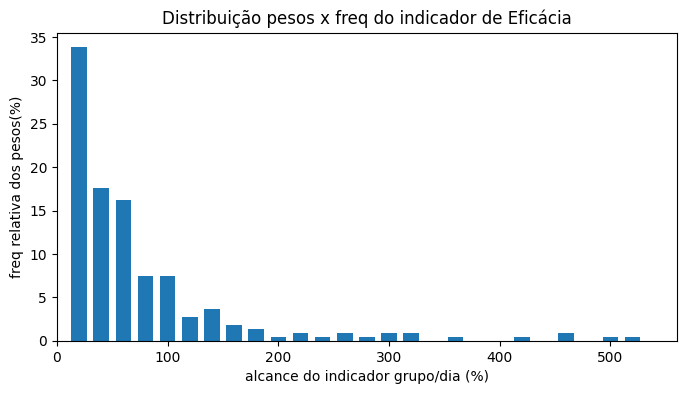

In [249]:
import matplotlib.pyplot as plt
valores = list(frequencia_relatorio1_indicador_utilizacao['percentual'])
rotulos = list(frequencia_relatorio1_indicador_utilizacao['relativo'])
fig, ax = plt.subplots(figsize=(8,4))
grafico = ax.bar(rotulos, valores,width=14.0)
#ax.bar_label(grafico, label_type='edge')
ax.set(xlim=[0,560],xlabel='alcance do indicador grupo/dia (%)',ylabel='freq relativa dos pesos(%)', title='Distribuição pesos x freq do indicador de Eficácia')
#ax.savefig('grafico_relatorio1.jpeg')
#frequencia_relatorio1_indicador_utilizacao.plot.barh(x='relativo',y='percentual').savefig('plot_relatorio1.jpeg',dpi=200)

Criando o arquivo csv da análise

In [ ]:
relatorio_agendamento_carioca_realizado.to_csv('relatorio1_bimestral_fev_mar_abr_agendamento_realizado.csv', index=False)

In [251]:
df_carioca_agend.to_csv('base_original_do_relatorio1_bimestral.csv', index=False)

### Utilizando o arquivo

In [92]:
relat01_bimestral = DataFrame(read_csv('relatorio1_bimestral_fev_mar_abr_agendamento_realizado.csv'))

In [93]:
relat01_bimestral = relat01_bimestral.dropna(axis=0)

In [94]:
relat01_bimestral.columns = ['status', 'data', 'especie', 'genero', 'obsoluto','relativo']

In [97]:
relat01_bimestral = relat01_bimestral.sort_values(by='data')

In [111]:
relat01_bimestral.tail(3)
#relat01_bimestral.shape

,status,data,especie,genero,obsoluto,relativo,meses
14,CIRURGIA REALIZADA,2024-05-02,canino,canino_femea,4,80.0,May
17,CIRURGIA REALIZADA,2024-05-02,felino,MACHO,1,20.0,May
16,CIRURGIA REALIZADA,2024-05-02,canino,canino_macho,2,40.0,May


Nessa etapa foi criada a função **converte_data(x)** para converter a data no formato americano.

In [96]:
from convert_datas import convert, converte_data
relat01_bimestral['data']= relat01_bimestral['data'].map(lambda x: converte_data(x))

In [98]:
relat01_bimestral['especie'] = relat01_bimestral['especie'].str.lower()

In [99]:
from pandas import Series
relat01_bimestral['meses'] = relat01_bimestral['data'].dt.month_name()

### Como pode ser visto na célula abaixo existe a falta de GOVERNÂNCIA no atributo GENERO, já que teríamos apenas duas opções: macho e femea.

In [100]:
relat01_bimestral['genero'].unique()

array(['FEMEA', 'FÊMEA ', 'MACHO', 'Macho', 'FÊMEA'], dtype=object)

#### Nessa etapa será realizado o ajuste do atributo GENERO.

Canino

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='MACHO') & (relat01_bimestral['especie']=='canino')] = 'canino_macho'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='Macho') & (relat01_bimestral['especie']=='canino')] = 'canino_macho'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='FEMEA') & (relat01_bimestral['especie']=='canino')] = 'canino_femea'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='FÊMEA') & (relat01_bimestral['especie']=='canino')] = 'canino_femea'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='FÊMEA ') & (relat01_bimestral['especie']=='canino')] = 'canino_femea'

Felino

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='MACHO') & (relat01_bimestral['especie']=='felino')] = 'felino_macho'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='Macho') & (relat01_bimestral['especie']=='felino')] = 'felino_macho'

In [ ]:
relat01_bimestral['genero'].loc[
(relat01_bimestral['genero']=='FEMEA') & (relat01_bimestral['especie']=='felino')] = 'felino_femea'

In [118]:
relat01_bimestral['genero'].unique()

array(['canino_femea', 'felino_femea', 'canino_macho', 'felino_macho'],
      dtype=object)

## Criação do PAINEL de DADOS

In [120]:
from pivottablejs import pivot_ui

pivot_ui(relat01_bimestral, outfile_path='/home/lino/Área de Trabalho/acaocidada/note_acaocidada/cariocarelatorio01.html', url='http://localhost/cariocarelatorio01.html')

### Por meio do boxplot, podemos perceber:

1. no boxplot 1 com espécies, o indicador de eficácia mostra que 75% das castrações nos últimas 2 meses não bateu a meta
2. no boxplot 2 com genero, mostra a falta de governança, logo não podemos concluir nada. 

 boxplot 1 com espécies

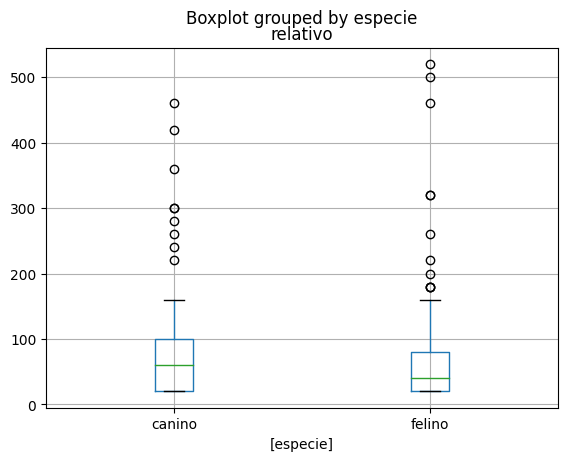

In [112]:
caixa = relat01_bimestral.boxplot(column=['relativo'],by= ['especie'])

boxplot 2 com genero

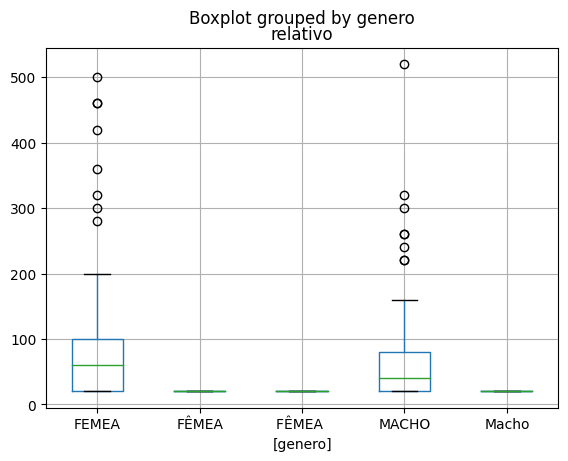

In [97]:
caixa = relat01_bimestral.boxplot(column=['relativo'],by= ['genero'])

---